In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [43]:
for i in range(55):
    if i==0:  #SNLI/TRAIN10000/TRAIN
        train = pd.read_pickle('salida/nuevo4f/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [44]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.082562,1.242375,2.156780,2.121928,3.793043,0.004627,0.226893,0,0.400000,0,...,2,5,0.500000,inf,0,,0,,0.50,neutral
1,0.006916,1.362675,1.543752,1.338269,3.938872,0.006773,0.071555,0,0.600000,0,...,3,5,0.250000,inf,0,,0,,0.25,contradiction
2,0.034248,1.354370,1.640224,1.370951,3.895909,0.004943,0.082896,0,0.200000,0,...,1,5,0.666667,inf,0,,0,,1.00,entailment
3,0.126237,0.972510,2.500000,1.500000,3.851369,0.003431,0.527127,0,0.250000,1,...,1,4,0.500000,inf,0,,0,,0.00,neutral
4,0.046895,1.365683,1.405639,1.000000,3.869048,0.004221,0.067400,0,0.250000,0,...,1,4,0.500000,inf,0,,0,,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,0.072425,0.945363,1.356343,1.256780,3.779226,0.004868,0.291775,1,1.250000,1,...,5,4,0.333333,inf,0,,0,,0.00,contradiction
549363,0.034644,1.000015,1.314536,1.143156,3.811096,0.005172,0.098681,0,1.500000,0,...,6,4,0.222222,inf,0,,0,,1.00,neutral
549364,0.085664,1.002710,2.015061,1.945531,3.673480,0.004461,0.414270,0,0.500000,0,...,3,6,0.400000,inf,0,,0,,0.50,neutral
549365,-0.008701,1.390492,1.603158,0.650022,3.801681,0.005378,0.033230,3,0.333333,0,...,2,6,0.333333,inf,0,,0,,0.25,contradiction


In [45]:
train.head(20)

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.082562,1.242375,2.156780,2.121928,3.793043,0.004627,0.226893,0,0.400000,0,...,2,5,0.500000,inf,0,,0,,0.500000,neutral
1,0.006916,1.362675,1.543752,1.338269,3.938872,0.006773,0.071555,0,0.600000,0,...,3,5,0.250000,inf,0,,0,,0.250000,contradiction
2,0.034248,1.354370,1.640224,1.370951,3.895909,0.004943,0.082896,0,0.200000,0,...,1,5,0.666667,inf,0,,0,,1.000000,entailment
3,0.126237,0.972510,2.500000,1.500000,3.851369,0.003431,0.527127,0,0.250000,1,...,1,4,0.500000,inf,0,,0,,0.000000,neutral
4,0.046895,1.365683,1.405639,1.000000,3.869048,0.004221,0.067400,0,0.250000,0,...,1,4,0.500000,inf,0,,0,,0.000000,entailment
5,0.189415,0.830182,1.811278,1.811278,3.934506,0.002993,0.650064,1,0.500000,1,...,2,4,0.500000,0.0,0,,0,,0.000000,contradiction
6,0.127027,1.138053,2.140518,1.792481,3.913990,0.003890,0.352373,1,0.166667,0,...,1,6,0.666667,inf,0,,0,,0.250000,contradiction
7,0.070973,1.298444,1.892080,1.459148,3.880972,0.003989,0.157001,1,0.166667,0,...,1,6,0.750000,inf,0,,0,,0.333333,entailment
8,0.025810,1.311606,1.434561,1.233225,3.763909,0.006792,0.139521,0,0.500000,0,...,3,6,0.250000,inf,0,,0,,0.500000,neutral
9,0.057272,1.172371,1.845150,1.416686,3.848723,0.005700,0.312738,3,0.133333,0,...,2,15,0.750000,inf,0,,0,,0.333333,neutral


In [46]:
train[train["clases"]=="contradiction"]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
1,0.006916,1.362675,1.543752,1.338269,3.938872,0.006773,0.071555,0,0.600000,0,...,3,5,0.250000,inf,0,,0,,0.25,contradiction
5,0.189415,0.830182,1.811278,1.811278,3.934506,0.002993,0.650064,1,0.500000,1,...,2,4,0.500000,0.0,0,,0,,0.00,contradiction
6,0.127027,1.138053,2.140518,1.792481,3.913990,0.003890,0.352373,1,0.166667,0,...,1,6,0.666667,inf,0,,0,,0.25,contradiction
10,0.059832,1.170044,1.978385,1.978385,3.826465,0.004320,0.302517,0,0.200000,1,...,3,15,0.000000,0.0,0,,0,,0.00,contradiction
13,0.032886,1.293765,1.960964,0.721928,3.741582,0.007567,0.163051,0,0.200000,0,...,1,5,0.000000,inf,0,,0,,0.50,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549353,0.110254,1.121954,1.626614,1.750000,3.774192,0.003351,0.370634,0,0.125000,0,...,1,8,0.500000,inf,0,,0,,0.00,contradiction
549356,0.000000,0.000000,1.921928,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,5,1.000000,0.0,0,,0,,1.00,contradiction
549358,0.000000,0.000000,1.625815,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,6,0.500000,0.0,0,,0,,0.50,contradiction
549362,0.072425,0.945363,1.356343,1.256780,3.779226,0.004868,0.291775,1,1.250000,1,...,5,4,0.333333,inf,0,,0,,0.00,contradiction


In [47]:
train["entropia_total"]=train["entropias"]/train["entropia_total"]

In [48]:
train["list_M"]=train["list_m"]/train["list_M"]

In [40]:
train["mearts"]=train["distancias"]*train["mearts"]

<Axes: title={'center': 'mearts'}, xlabel='clases'>

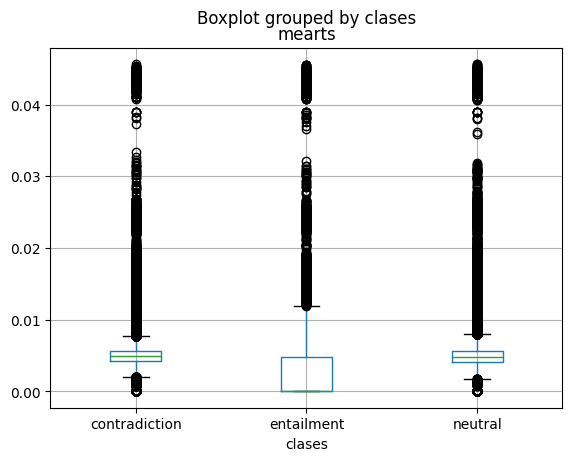

In [39]:
train.boxplot(by="clases",column="mearts")

<Axes: title={'center': 'mearts'}, xlabel='clases'>

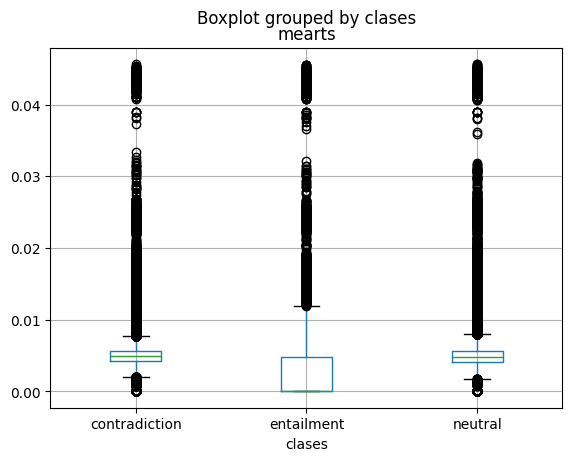

In [49]:
train.boxplot(by="clases",column="mearts")

/home/david/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/matplotlib/cbook.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/matplotlib/cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<Axes: title={'center': 'KL_divergence'}, xlabel='clases'>

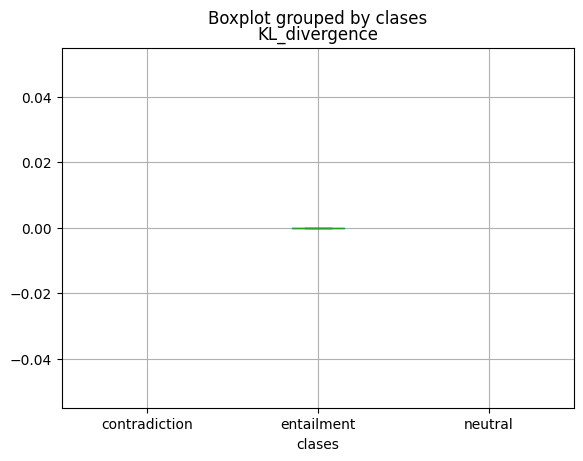

In [20]:
train.boxplot(by="clases",column="KL_divergence")

## Eliminar características

In [50]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT","entropias","list_m","distancias"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.082562,0.983841,3.793043,0.004627,0.226893,0,0.400000,0,0.500000,5,0.500000,inf,0,0,0.50,neutral
1,0.006916,0.866894,3.938872,0.006773,0.071555,0,0.600000,0,0.750000,5,0.250000,inf,0,0,0.25,contradiction
2,0.034248,0.835831,3.895909,0.004943,0.082896,0,0.200000,0,0.333333,5,0.666667,inf,0,0,1.00,entailment
3,0.126237,0.600000,3.851369,0.003431,0.527127,0,0.250000,1,0.500000,4,0.500000,inf,0,0,0.00,neutral
4,0.046895,0.711420,3.869048,0.004221,0.067400,0,0.250000,0,0.500000,4,0.500000,inf,0,0,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,0.072425,0.926594,3.779226,0.004868,0.291775,1,1.250000,1,0.833333,4,0.333333,inf,0,0,0.00,contradiction
549363,0.034644,0.869627,3.811096,0.005172,0.098681,0,1.500000,0,0.666667,4,0.222222,inf,0,0,1.00,neutral
549364,0.085664,0.965495,3.673480,0.004461,0.414270,0,0.500000,0,0.600000,6,0.400000,inf,0,0,0.50,neutral
549365,-0.008701,0.405464,3.801681,0.005378,0.033230,3,0.333333,0,0.333333,6,0.333333,inf,0,0,0.25,contradiction


In [51]:
train.columns

Index(['sumas', 'entropia_total', 'mutinf', 'mearts', 'max_info', 'list_comp',
       'diferencias', 'list_incomp', 'list_M', 'list_T', 'Jaro-Winkler_rit',
       'KL_divergence', 'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [52]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [53]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [54]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [55]:
train_m

,sumas,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
sumas,1.000000,0.618139,0.579510,0.187087,0.858408,-0.105954,0.352811,0.312950,0.408326,-0.123418,-0.190398,0.249956,-0.001211,-0.012524,-0.191221
entropia_total,0.618139,1.000000,0.885873,0.394022,0.695122,-0.118480,0.586138,0.307585,0.789973,0.080365,-0.478328,0.244920,0.003826,0.029650,-0.414230
mutinf,0.579510,0.885873,1.000000,0.421085,0.638849,-0.084003,0.548752,0.224361,0.705518,0.014315,-0.428904,0.237212,0.001627,0.054536,-0.357091
mearts,0.187087,0.394022,0.421085,1.000000,0.196189,-0.051349,0.348375,0.070345,0.417032,-0.042047,-0.268415,0.190010,0.000108,0.013786,-0.213752
max_info,0.858408,0.695122,0.638849,0.196189,1.000000,-0.119014,0.297906,0.428031,0.452473,0.072176,-0.199563,0.227457,0.004189,-0.004129,-0.205329
list_comp,-0.105954,-0.118480,-0.084003,-0.051349,-0.119014,1.000000,-0.084678,-0.211650,-0.236138,0.040593,-0.007592,0.097067,-0.001630,0.015849,-0.278607
diferencias,0.352811,0.586138,0.548752,0.348375,0.297906,-0.084678,1.000000,0.288448,0.739729,-0.304740,-0.483418,0.121993,-0.009929,0.058536,-0.401246
list_incomp,0.312950,0.307585,0.224361,0.070345,0.428031,-0.211650,0.288448,1.000000,0.390644,0.039735,-0.092328,-0.033603,-0.002021,-0.000346,-0.153075
list_M,0.408326,0.789973,0.705518,0.417032,0.452473,-0.236138,0.739729,0.390644,1.000000,-0.018283,-0.630848,0.125185,0.001750,0.034519,-0.550540
list_T,-0.123418,0.080365,0.014315,-0.042047,0.072176,0.040593,-0.304740,0.039735,-0.018283,1.000000,0.056263,-0.015588,0.035399,0.004747,-0.004306


<Axes: >

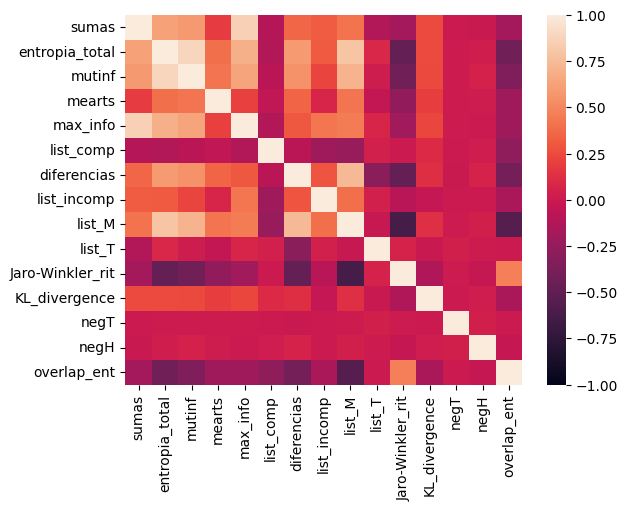

In [56]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [57]:
train_m

,sumas,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
sumas,1.000000,0.618139,0.579510,0.187087,0.858408,-0.105954,0.352811,0.312950,0.408326,-0.123418,-0.190398,0.249956,-0.001211,-0.012524,-0.191221
entropia_total,0.618139,1.000000,0.885873,0.394022,0.695122,-0.118480,0.586138,0.307585,0.789973,0.080365,-0.478328,0.244920,0.003826,0.029650,-0.414230
mutinf,0.579510,0.885873,1.000000,0.421085,0.638849,-0.084003,0.548752,0.224361,0.705518,0.014315,-0.428904,0.237212,0.001627,0.054536,-0.357091
mearts,0.187087,0.394022,0.421085,1.000000,0.196189,-0.051349,0.348375,0.070345,0.417032,-0.042047,-0.268415,0.190010,0.000108,0.013786,-0.213752
max_info,0.858408,0.695122,0.638849,0.196189,1.000000,-0.119014,0.297906,0.428031,0.452473,0.072176,-0.199563,0.227457,0.004189,-0.004129,-0.205329
list_comp,-0.105954,-0.118480,-0.084003,-0.051349,-0.119014,1.000000,-0.084678,-0.211650,-0.236138,0.040593,-0.007592,0.097067,-0.001630,0.015849,-0.278607
diferencias,0.352811,0.586138,0.548752,0.348375,0.297906,-0.084678,1.000000,0.288448,0.739729,-0.304740,-0.483418,0.121993,-0.009929,0.058536,-0.401246
list_incomp,0.312950,0.307585,0.224361,0.070345,0.428031,-0.211650,0.288448,1.000000,0.390644,0.039735,-0.092328,-0.033603,-0.002021,-0.000346,-0.153075
list_M,0.408326,0.789973,0.705518,0.417032,0.452473,-0.236138,0.739729,0.390644,1.000000,-0.018283,-0.630848,0.125185,0.001750,0.034519,-0.550540
list_T,-0.123418,0.080365,0.014315,-0.042047,0.072176,0.040593,-0.304740,0.039735,-0.018283,1.000000,0.056263,-0.015588,0.035399,0.004747,-0.004306


In [58]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropia_total,0.618139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.579510,0.885873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts,0.187087,0.394022,0.421085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,0.858408,0.695122,0.638849,0.196189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_comp,-0.105954,-0.118480,-0.084003,-0.051349,-0.119014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
diferencias,0.352811,0.586138,0.548752,0.348375,0.297906,-0.084678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_incomp,0.312950,0.307585,0.224361,0.070345,0.428031,-0.211650,0.288448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_M,0.408326,0.789973,0.705518,0.417032,0.452473,-0.236138,0.739729,0.390644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_T,-0.123418,0.080365,0.014315,-0.042047,0.072176,0.040593,-0.304740,0.039735,-0.018283,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [59]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

mutinf entropia_total 0.8858727201927822
max_info sumas 0.858408410718677
list_M entropia_total 0.78997345463426
list_M mutinf 0.705518271516153
list_M diferencias 0.7397293433116386


In [60]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

In [185]:
# Checar variables colineales
#sns.relplot(data=train_m, x="distancias", y="diferencias")

In [186]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [61]:
# SICK
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    elif i == "neutral":
        y_train.append(2)
    else:
        y_train.append(0)

In [62]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

ValueError: Input X contains infinity or a value too large for dtype('float64').

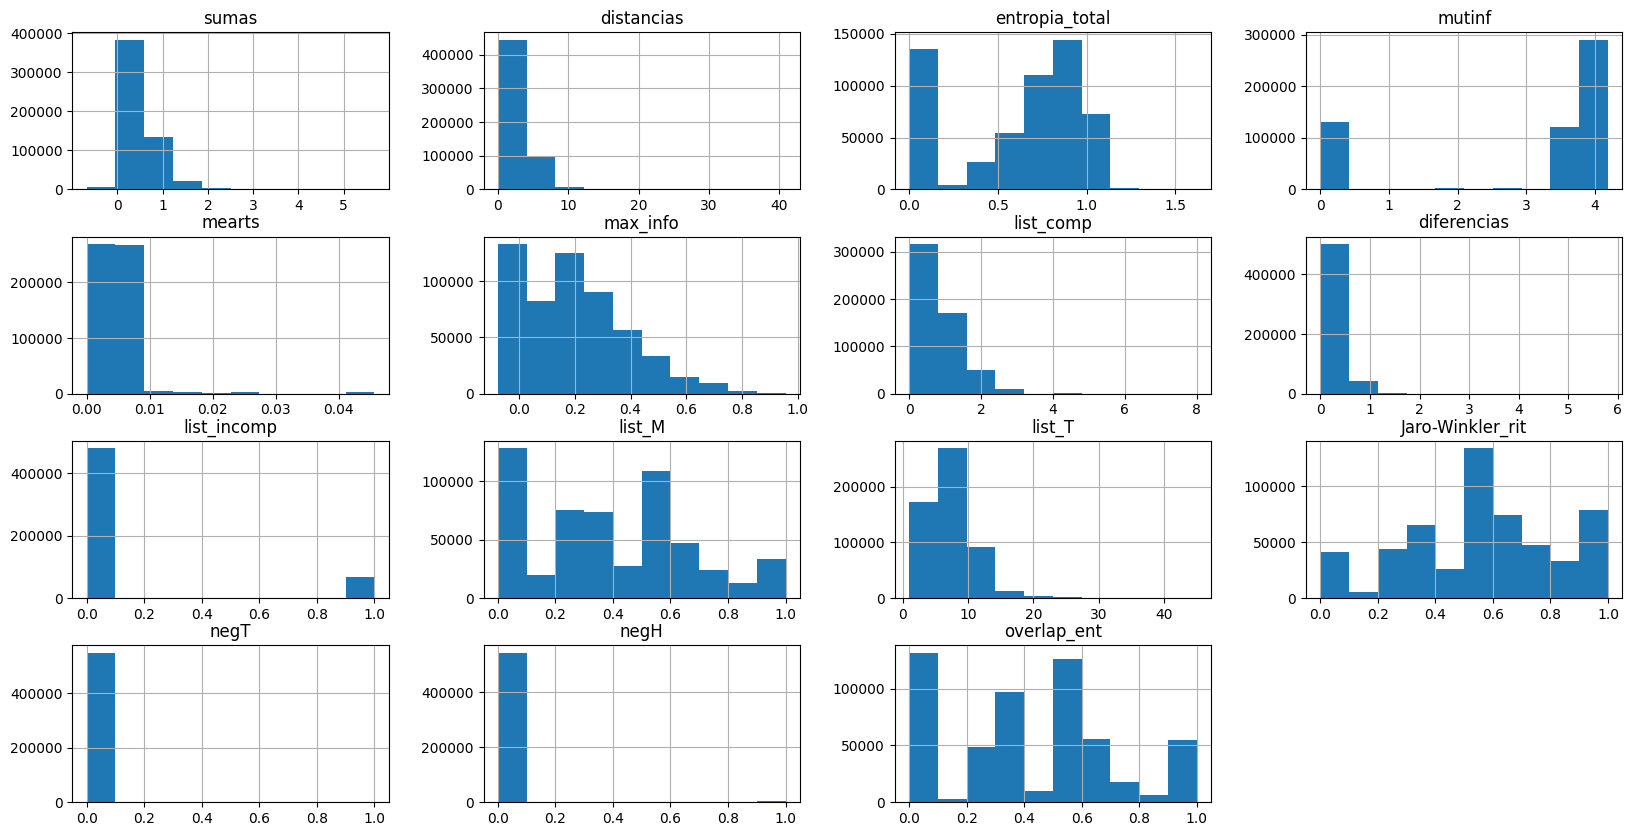

In [ ]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [36]:
for i in range(10):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

FileNotFoundError: [Errno 2] No such file or directory: 'salida/nuevo4f/SNLI/TEST/TEST_1.csv_.pickle'

In [191]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.214869,4.315784,1.623,0.979,3.720471,0.005341,0.079564,0,0.333333,0,4,3,9,0.250000,0,,0,,0.250000,neutral
1,0.196621,1.452301,2.638,1.530,3.683948,0.004802,0.086685,0,0.111111,0,3,1,9,0.333333,0,,0,,0.500000,entailment
2,0.422657,4.271279,2.013,1.249,3.718987,0.004896,0.190205,0,0.333333,0,4,3,9,0.250000,0,,0,,0.333333,contradiction
3,0.652139,1.426227,1.491,1.406,3.911284,0.007970,0.289942,0,0.125000,0,2,1,8,0.500000,0,,0,,0.500000,neutral
4,0.645156,1.437866,1.440,1.061,3.859440,0.004270,0.334325,0,0.125000,0,3,1,8,0.333333,0,,0,,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.449262,4.191435,2.122,1.855,3.916058,0.005144,0.224988,0,0.750000,0,5,3,4,0.400000,0,,0,,0.333333,contradiction
9814,0.634237,2.810015,1.947,1.549,3.929169,0.003716,0.551001,0,0.500000,1,3,2,4,1.000000,0,,0,,0.333333,entailment
9815,0.245401,2.847669,1.414,0.811,3.787320,0.004292,0.084199,0,0.250000,0,3,2,8,0.333333,0,,0,,0.333333,contradiction
9816,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,8,0.666667,0,,0,,1.000000,entailment


In [192]:
test["entropia_total"]=test["entropias"]/test["entropia_total"]
test["list_M"]=test["list_m"]/test["list_M"]

In [193]:
test=test.drop(["verbH","verbT","entropias","list_m"],axis=1)
test

,sumas,distancias,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.214869,4.315784,0.603204,3.720471,0.005341,0.079564,0,0.333333,0,0.750000,9,0.250000,0,0,0.250000,neutral
1,0.196621,1.452301,0.579985,3.683948,0.004802,0.086685,0,0.111111,0,0.333333,9,0.333333,0,0,0.500000,entailment
2,0.422657,4.271279,0.620467,3.718987,0.004896,0.190205,0,0.333333,0,0.750000,9,0.250000,0,0,0.333333,contradiction
3,0.652139,1.426227,0.942991,3.911284,0.007970,0.289942,0,0.125000,0,0.500000,8,0.500000,0,0,0.500000,neutral
4,0.645156,1.437866,0.736806,3.859440,0.004270,0.334325,0,0.125000,0,0.333333,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.449262,4.191435,0.874175,3.916058,0.005144,0.224988,0,0.750000,0,0.600000,4,0.400000,0,0,0.333333,contradiction
9814,0.634237,2.810015,0.795583,3.929169,0.003716,0.551001,0,0.500000,1,0.666667,4,1.000000,0,0,0.333333,entailment
9815,0.245401,2.847669,0.573550,3.787320,0.004292,0.084199,0,0.250000,0,0.666667,8,0.333333,0,0,0.333333,contradiction
9816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,8,0.666667,0,0,1.000000,entailment


In [194]:
test[test["clases"]=="contradiction"]

,sumas,distancias,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
2,0.422657,4.271279,0.620467,3.718987,0.004896,0.190205,0,0.333333,0,0.750000,9,0.250000,0,0,0.333333,contradiction
5,0.039558,1.455392,0.864847,4.029551,0.005088,0.079535,0,0.125000,0,0.500000,8,0.500000,0,0,0.000000,contradiction
8,0.181088,1.451486,0.761653,3.890296,0.005573,0.125167,1,0.166667,0,0.333333,6,0.333333,0,0,0.250000,contradiction
11,0.210572,4.229250,0.746900,3.824191,0.005879,0.116248,0,0.750000,0,0.750000,4,0.000000,0,0,0.250000,contradiction
14,0.388837,4.227948,0.855589,3.949692,0.005434,0.212342,0,0.750000,0,0.750000,4,0.250000,0,0,0.333333,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,0.540182,1.408807,0.620347,3.794753,0.005117,0.297479,0,0.250000,0,0.333333,4,0.666667,0,0,0.666667,contradiction
9807,0.422225,4.334575,0.859028,3.715744,0.004536,0.197734,0,0.250000,0,0.600000,12,0.600000,0,0,0.250000,contradiction
9810,0.261922,5.842538,1.000000,3.721939,0.005534,0.112340,0,0.400000,0,1.000000,10,0.250000,0,0,0.000000,contradiction
9813,0.449262,4.191435,0.874175,3.916058,0.005144,0.224988,0,0.750000,0,0.600000,4,0.400000,0,0,0.333333,contradiction


In [195]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
test

,sumas,distancias,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.214869,4.315784,0.603204,3.720471,0.005341,0.079564,0,0.333333,0,0.750000,9,0.250000,0,0,0.250000,neutral
1,0.196621,1.452301,0.579985,3.683948,0.004802,0.086685,0,0.111111,0,0.333333,9,0.333333,0,0,0.500000,entailment
2,0.422657,4.271279,0.620467,3.718987,0.004896,0.190205,0,0.333333,0,0.750000,9,0.250000,0,0,0.333333,contradiction
3,0.652139,1.426227,0.942991,3.911284,0.007970,0.289942,0,0.125000,0,0.500000,8,0.500000,0,0,0.500000,neutral
4,0.645156,1.437866,0.736806,3.859440,0.004270,0.334325,0,0.125000,0,0.333333,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.449262,4.191435,0.874175,3.916058,0.005144,0.224988,0,0.750000,0,0.600000,4,0.400000,0,0,0.333333,contradiction
9814,0.634237,2.810015,0.795583,3.929169,0.003716,0.551001,0,0.500000,1,0.666667,4,1.000000,0,0,0.333333,entailment
9815,0.245401,2.847669,0.573550,3.787320,0.004292,0.084199,0,0.250000,0,0.666667,8,0.333333,0,0,0.333333,contradiction
9816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,8,0.666667,0,0,1.000000,entailment


In [196]:
test

,sumas,distancias,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.214869,4.315784,0.603204,3.720471,0.005341,0.079564,0,0.333333,0,0.750000,9,0.250000,0,0,0.250000,neutral
1,0.196621,1.452301,0.579985,3.683948,0.004802,0.086685,0,0.111111,0,0.333333,9,0.333333,0,0,0.500000,entailment
2,0.422657,4.271279,0.620467,3.718987,0.004896,0.190205,0,0.333333,0,0.750000,9,0.250000,0,0,0.333333,contradiction
3,0.652139,1.426227,0.942991,3.911284,0.007970,0.289942,0,0.125000,0,0.500000,8,0.500000,0,0,0.500000,neutral
4,0.645156,1.437866,0.736806,3.859440,0.004270,0.334325,0,0.125000,0,0.333333,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.449262,4.191435,0.874175,3.916058,0.005144,0.224988,0,0.750000,0,0.600000,4,0.400000,0,0,0.333333,contradiction
9814,0.634237,2.810015,0.795583,3.929169,0.003716,0.551001,0,0.500000,1,0.666667,4,1.000000,0,0,0.333333,entailment
9815,0.245401,2.847669,0.573550,3.787320,0.004292,0.084199,0,0.250000,0,0.666667,8,0.333333,0,0,0.333333,contradiction
9816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,8,0.666667,0,0,1.000000,entailment


In [197]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [198]:
# SICK
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    elif i == "neutral":
        y_test.append(2)
    else:
        y_test.append(0)

In [199]:
y_test.count(1)

3366

In [200]:
y_test.count(0)

3235

In [201]:
y_test.count(2)

3217

In [202]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [203]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [204]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [211]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[ 0.07273089,  0.07076966,  0.60712285, ...,  0.        ,
         0.        ,  0.5       ],
       [ 0.00609215,  0.10670145,  0.53479848, ...,  0.        ,
         0.        ,  0.25      ],
       [ 0.03016978,  0.0357404 ,  0.5159112 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.09055675,  0.10665401,  0.59600394, ...,  0.        ,
         0.        ,  0.5       ],
       [-0.00919764,  0.07185783,  0.25024256, ...,  0.        ,
         0.        ,  0.25      ],
       [ 0.23111101,  0.03524769,  0.58366278, ...,  0.        ,
         0.        ,  0.5       ]])

In [212]:
X_train.shape

(549367, 15)

In [207]:
#model = LogisticRegression(penalty="l2", C=1,max_iter=500,n_jobs=5,multi_class='multinomial',solver='newton-cg')
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [208]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [214]:
model.decision_function(X_train)

array([[ 0.1482781 , -0.47924369,  0.33096559],
       [ 0.72171145, -1.19149848,  0.46978703],
       [-0.21258971, -0.08215797,  0.29474767],
       ...,
       [ 0.38121807, -0.86770922,  0.48649115],
       [ 0.4030029 , -1.40372783,  1.00072493],
       [-0.23261848, -0.0652062 ,  0.29782468]])

In [215]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'mutinf', 'mearts', 'max_info',
       'list_comp', 'diferencias', 'list_incomp', 'list_M', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [216]:
model.classes_

array([0, 1, 2])

In [217]:
model.coef_[0]

array([-3.02806452,  2.98623617, -0.00330349,  0.55045895, -0.15562881,
        0.44164731,  0.07528408, -0.36974664,  0.54558782,  0.62928039,
        0.71685795, -0.35868563, -0.01360971,  0.41998557, -0.35896693])

In [218]:
coeficientes=model.coef_[0]

In [219]:
coeficientes

array([-3.02806452,  2.98623617, -0.00330349,  0.55045895, -0.15562881,
        0.44164731,  0.07528408, -0.36974664,  0.54558782,  0.62928039,
        0.71685795, -0.35868563, -0.01360971,  0.41998557, -0.35896693])

In [220]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 distancias 0 sumas


In [221]:
n_columns=train.shape[1]-1

In [222]:
n_columns

15

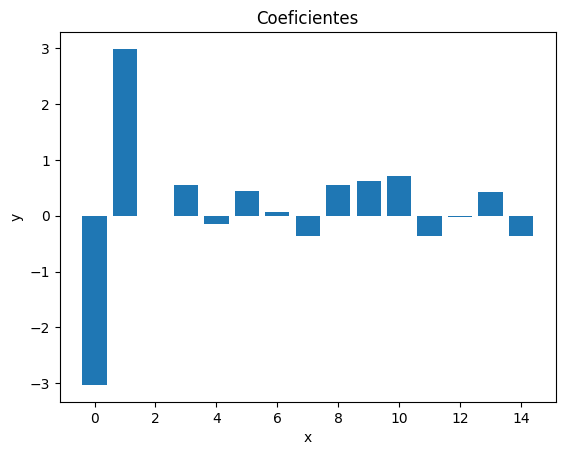

In [223]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [224]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.05904222, 0.24860383, 0.40461522, ..., 0.        , 0.        ,
        0.25      ],
       [0.05402802, 0.08365749, 0.38904038, ..., 0.        , 0.        ,
        0.5       ],
       [0.1161388 , 0.24604018, 0.41619486, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.06743204, 0.16403538, 0.38472419, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16351377, 0.16732216, 0.61585258, ..., 0.        , 0.        ,
        0.5       ]])

In [225]:
X_test.shape

(9818, 15)

In [226]:
predictions = model.predict(X_test)

In [227]:
test["predictions"]=predictions
test

,sumas,distancias,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,0.214869,4.315784,0.603204,3.720471,0.005341,0.079564,0,0.333333,0,0.750000,9,0.250000,0,0,0.250000,neutral,2
1,0.196621,1.452301,0.579985,3.683948,0.004802,0.086685,0,0.111111,0,0.333333,9,0.333333,0,0,0.500000,entailment,2
2,0.422657,4.271279,0.620467,3.718987,0.004896,0.190205,0,0.333333,0,0.750000,9,0.250000,0,0,0.333333,contradiction,2
3,0.652139,1.426227,0.942991,3.911284,0.007970,0.289942,0,0.125000,0,0.500000,8,0.500000,0,0,0.500000,neutral,2
4,0.645156,1.437866,0.736806,3.859440,0.004270,0.334325,0,0.125000,0,0.333333,8,0.333333,0,0,0.500000,entailment,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.449262,4.191435,0.874175,3.916058,0.005144,0.224988,0,0.750000,0,0.600000,4,0.400000,0,0,0.333333,contradiction,2
9814,0.634237,2.810015,0.795583,3.929169,0.003716,0.551001,0,0.500000,1,0.666667,4,1.000000,0,0,0.333333,entailment,0
9815,0.245401,2.847669,0.573550,3.787320,0.004292,0.084199,0,0.250000,0,0.666667,8,0.333333,0,0,0.333333,contradiction,2
9816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,8,0.666667,0,0,1.000000,entailment,1


In [228]:
test[(test["clases"]=="entailment") & (test["predictions"]==0)]

,sumas,distancias,entropia_total,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
77,0.786942,1.444455,0.562302,3.985677,0.005991,0.514878,0,0.090909,1,0.500000,11,0.500000,0,0,0.500000,entailment,0
142,0.690668,1.409561,0.738288,3.924461,0.010170,0.514878,0,0.200000,1,0.333333,5,0.333333,0,0,0.666667,entailment,0
160,1.059365,3.839474,0.844083,2.568830,0.016570,0.247142,1,0.230769,1,0.600000,13,0.600000,0,1,0.333333,entailment,0
169,0.660730,1.424306,0.906045,3.924908,0.003836,0.514878,0,0.142857,1,0.500000,7,0.500000,0,0,0.500000,entailment,0
174,0.364988,4.272614,1.000000,3.760663,0.004472,0.236388,0,0.500000,1,1.000000,6,0.000000,0,0,0.000000,entailment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,0.310931,2.766791,1.000000,3.744370,0.005227,0.184969,0,0.666667,0,1.000000,3,0.500000,0,0,0.000000,entailment,0
9762,0.691908,5.564043,1.000000,3.803229,0.006679,0.396899,0,1.000000,1,1.000000,4,0.750000,0,0,0.000000,entailment,0
9787,0.528900,2.863626,0.709821,3.737009,0.005339,0.251740,0,0.250000,1,0.666667,8,0.333333,0,0,0.333333,entailment,0
9798,0.425767,1.408528,0.656743,3.839034,0.004554,0.179026,0,0.250000,1,0.333333,4,0.666667,0,0,0.500000,entailment,0


In [229]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[1855 1261  250]
 [ 328 2593  296]
 [ 309 2114  812]]


In [ ]:
# [[2131  812  423]
#  [ 483 1946  788]
#  [ 514 1175 1546]]
# [[1780  676  910]
#  [ 294  932 1991]
#  [ 229  643 2363]]
# [[1773 1181  412]
#  [ 288 2229  700]
#  [ 224 1646 1365]]

In [230]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.54
precision:  0.59
recall 0.54
f1_score:  0.52
matthews_score:  0.34


In [231]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.54
precision:  0.59
recall 0.54
f1_score:  0.52
matthews_score:  0.34


In [232]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.54
precision:  0.59
recall 0.54
f1_score:  0.52
matthews_score:  0.34


In [233]:
X_train.shape

(549367, 15)

In [234]:
X_test.shape

(9818, 15)

In [235]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [236]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [237]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
print(msg)

In [66]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.580000 (0.002474)


In [67]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg = "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

KeyboardInterrupt: 

In [67]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.580000 (0.012075)
Logistic Regression Recall:: 0.580000 (0.012836)
Logistic Regression F1-score:: 0.580000 (0.012987)


In [69]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.580000 (0.012404)
Logistic Regression Recall:: 0.580000 (0.012404)
Logistic Regression F1-score:: 0.580000 (0.012404)


In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

In [65]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [66]:
#linear_model

In [67]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [70]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.58      0.28      0.38      3235
           1       0.71      0.59      0.65      3366
           2       0.45      0.77      0.57      3217

    accuracy                           0.54      9818
   macro avg       0.58      0.54      0.53      9818
weighted avg       0.58      0.54      0.53      9818



In [ ]:
#               precision    recall  f1-score   support

#            0       0.59      0.29      0.39      3235
#            1       0.72      0.59      0.64      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.55      9818
#    macro avg       0.59      0.55      0.53      9818
# weighted avg       0.59      0.55      0.54      9818

In [66]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [67]:
test.columns[:-2]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [68]:
explainer.expected_value

array([-0.00763222, -0.06694131,  0.07457353])

In [69]:
X_test

array([[0.05904222, 0.2702385 , 0.51425856, ..., 0.        , 0.        ,
        0.25      ],
       [0.05402802, 0.09093776, 0.83586819, ..., 0.        , 0.        ,
        0.5       ],
       [0.1161388 , 0.26745176, 0.6378327 , ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.06743204, 0.17831051, 0.44803549, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.62008872, ..., 0.        , 0.        ,
        1.        ],
       [0.16351377, 0.18188332, 0.72750317, ..., 0.        , 0.        ,
        0.5       ]])

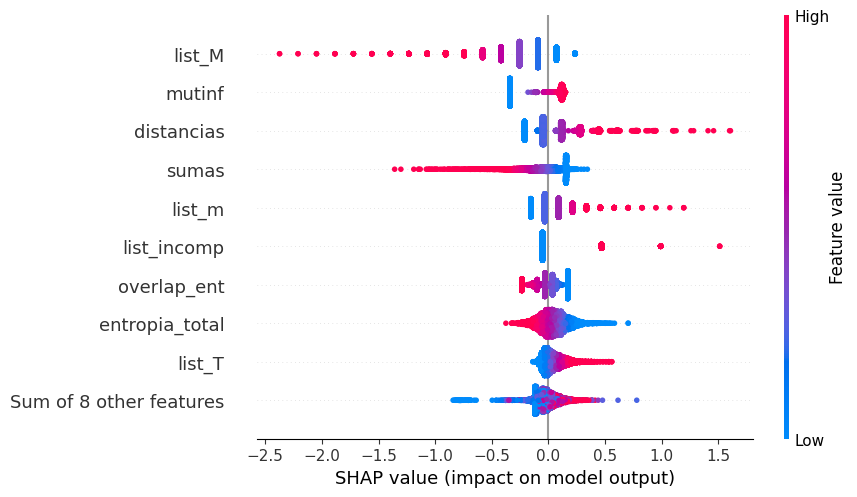

In [71]:
shap.plots.beeswarm(shap_values[:,:,0])

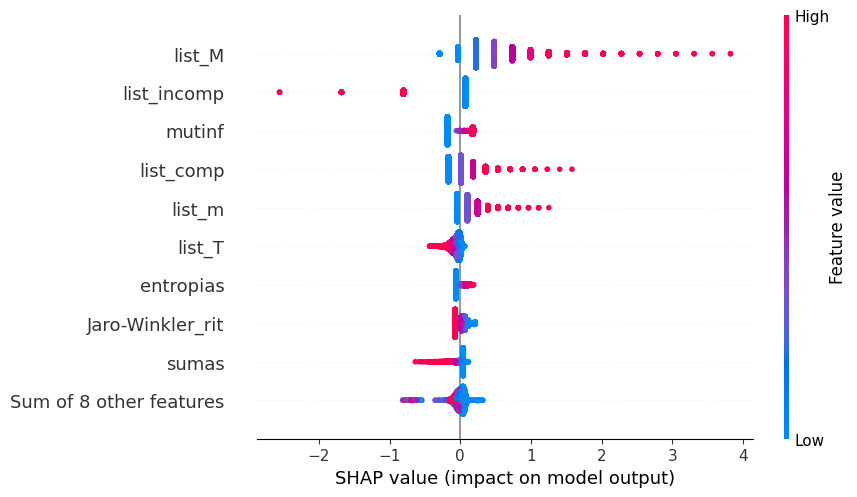

In [133]:
shap.plots.beeswarm(shap_values[:,:,2])

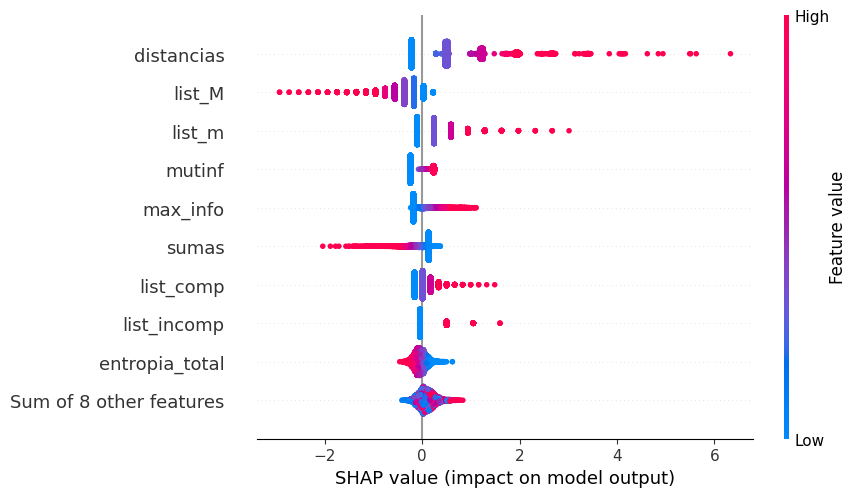

In [134]:
shap.plots.beeswarm(shap_values[:,:,0])

In [63]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.23912561 0.52693283 0.09193841 0.81246962 0.1        0.01923077
 0.33333333 0.17647059 0.11111111 0.46428571 0.66666667 0.
 0.         0.25      ] 0 0


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

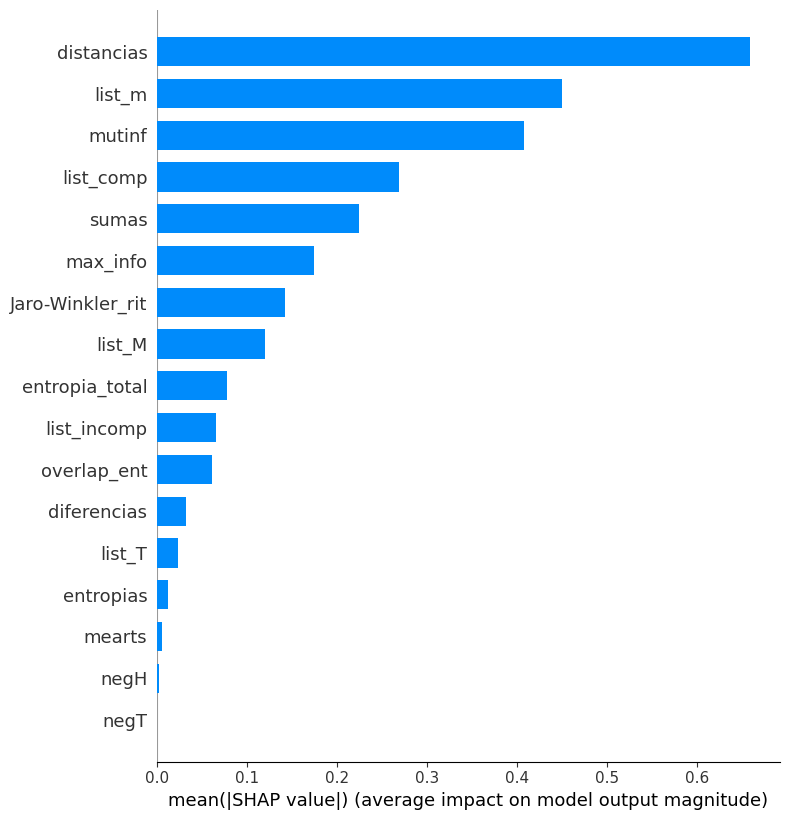

In [138]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

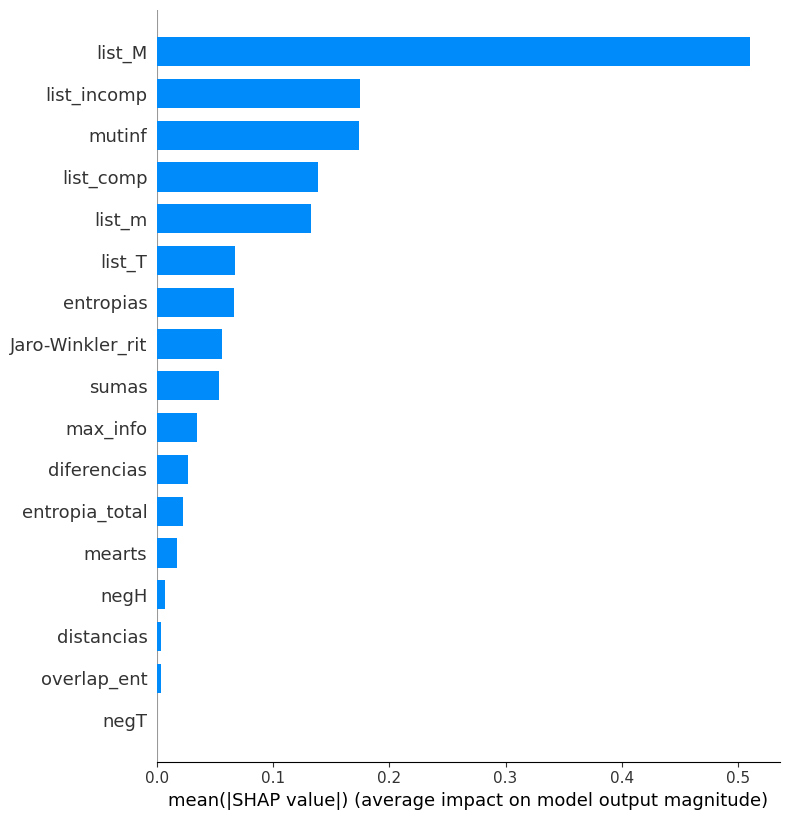

In [139]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

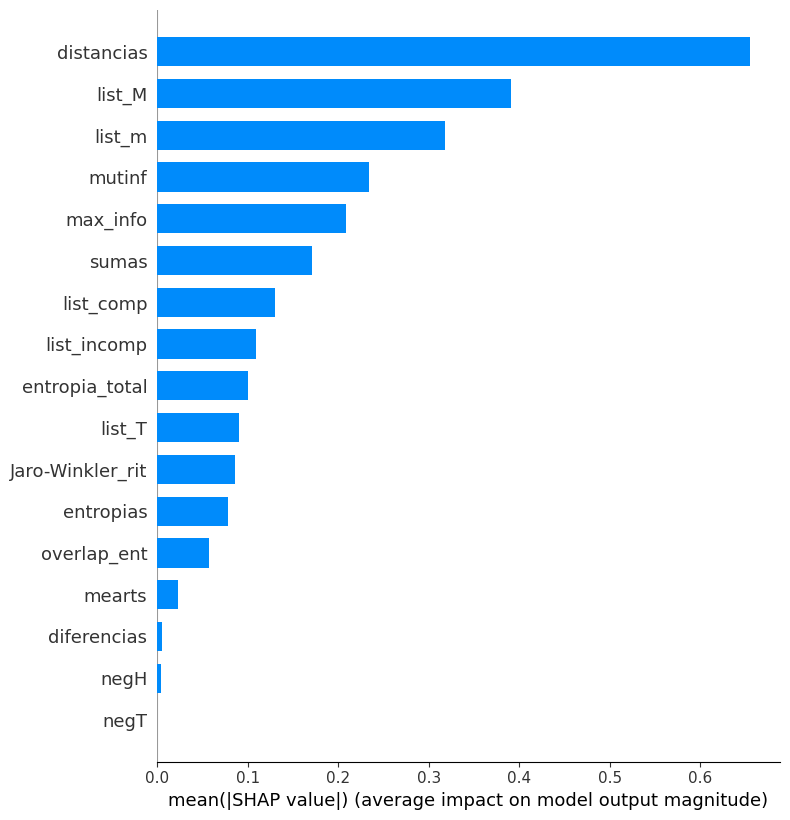

In [140]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

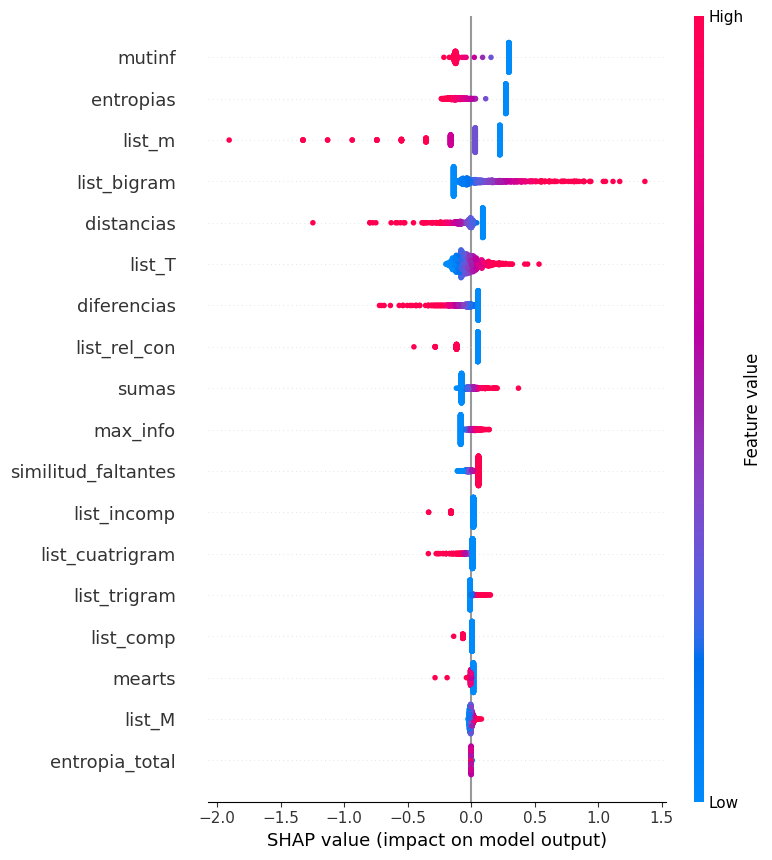

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

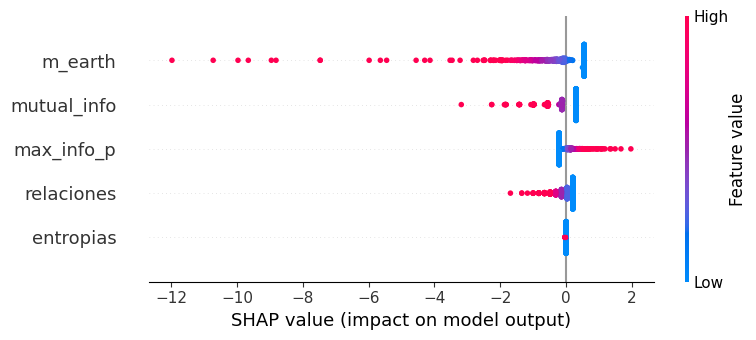

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

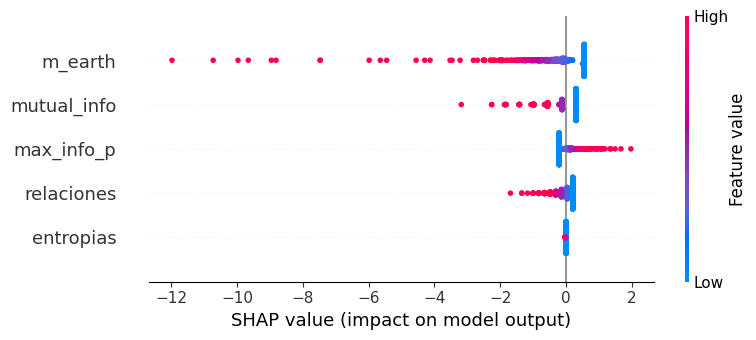

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


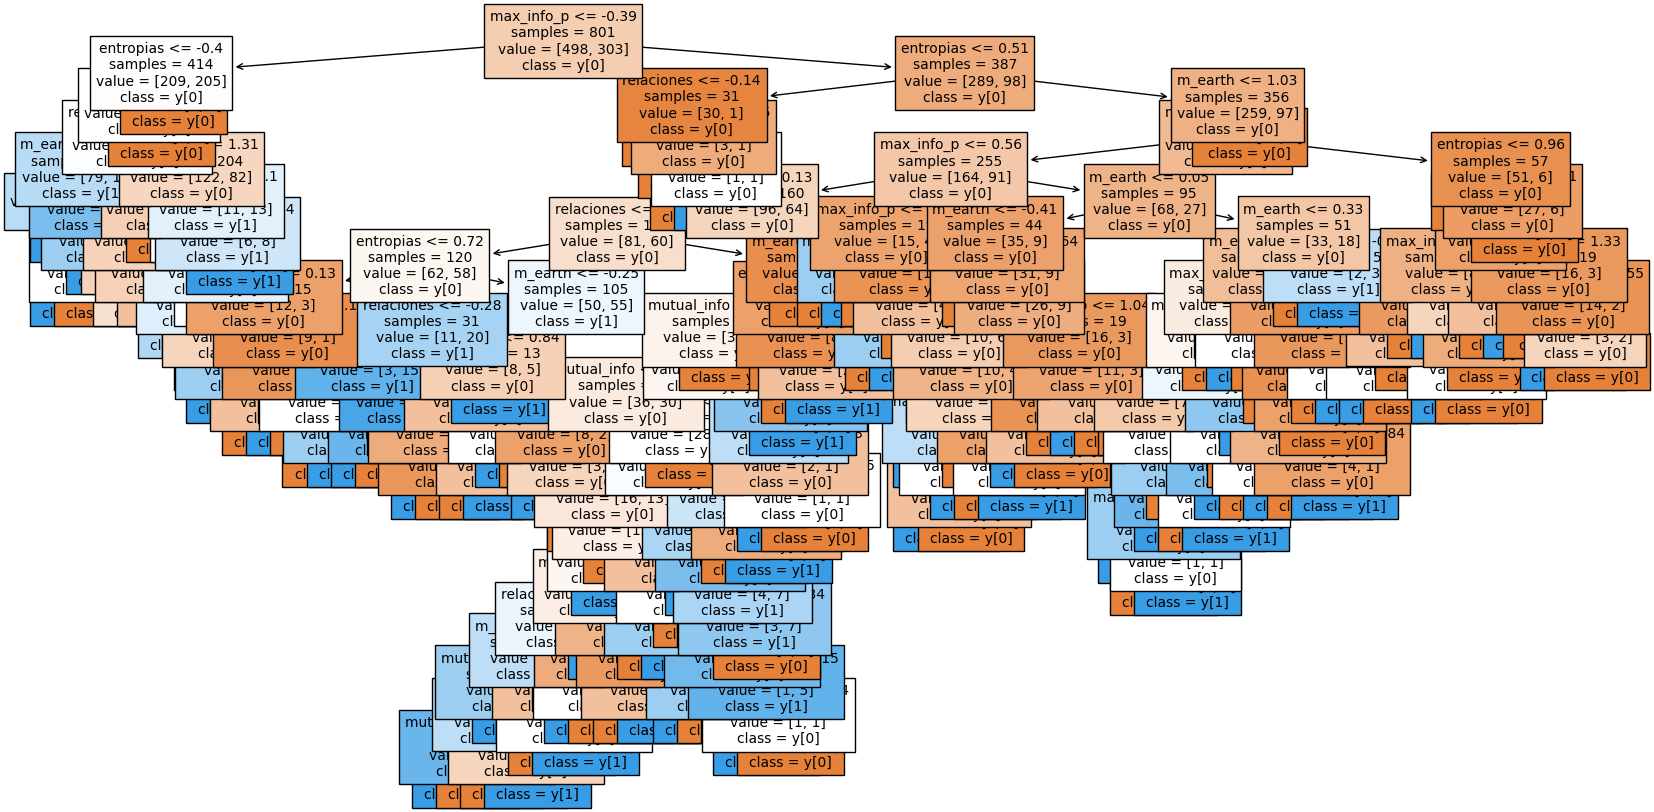

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )